In [1]:
# Feature Extraction : feature을 추출한다: 텍스트의 고유한 속성을 추출하는 작업.
# feature: 어떤 현상의 개별 측정 가능한 특성, 속성.
# feature engineering: 피처 추출 + 피처 재추출(원하는 것이 더 있어서 특징을 다시 추출하는 것)
    # --> feature extraction보다 더 넓은 범위.
    
# 데이터 정제: 우리가 지금까지 한 것. 작업이 비슷하다고 생각할 수 있는데 좀 다르다
  # 우리가 지금까지 배웠던 게 데이터 정제다(야채 자르기). 이제부턴 야채를 자르는게 아니라 요리를 한다.
    
# 일반적인 피처:
  # - 자연어 -> 자연어
  # 텍스트 길이, 단어 개수, .... 등등 (분석)

# 특수한 피처:
  # - 자연어 -> 벡터 (숫자로 변환함)
  # - 어떤 숫자로 바꿀 것인가?

# - 피처 추출 왜 하는가?
#   - 연산량을 줄이기 위해.
#   - 중요한 것만 모델링에서 다루기 위해.
#   - 모델 성능을 높이려면 피처 추출을 잘 해야 한다.

# 오늘 할 내용: pandas, numpy, 시각화

In [2]:
# pandas : 테이블 형태로 데이터를 분석하는 툴.
# structure이 없는 데이터를 structure로 만든다.
# 몇열 몇행 찾아서 값을 바로 뽑아낼 수 있다.
# 즉, pandas로 데이터에 구조를 만드는 작업을 하는 것이다.
# Series(1차원), DataFrame(2차원 이상)
# 가로: column, 세로: row 또는 index,  값: value

In [4]:
import pandas as pd

#데이터 프레임 만드는 형식
#pd.DataFrame(data, index, columns, dtype)

pd.DataFrame([['a','b','c'],
               ['d','e','f']])
#아직 column과 index의 이름이 안 정해진 상태

,0,1,2
0,a,b,c
1,d,e,f


In [6]:
# 이 데이터프레임을 df라는 변수에 저장
df = pd.DataFrame([['a','b','c'],
               ['d','e','f']])
df

,0,1,2
0,a,b,c
1,d,e,f


In [8]:
# 칼럼 이름을 변경하는 방법
# df.columns = [칼럼 이름들]
# 예) df.columns = ['변수명1','변수명2','변수명3'] 

df.columns = ['z1','z2','z3']
df
#칼럼 이름이 'z1','z2','z3'으로 변경되었다.

,z1,z2,z3
0,a,b,c
1,d,e,f


In [10]:
#데이터 프레임 만들 때 처음부터 칼럼 이름을 정해줘도 된다.
#pd.DataFrame(데이터, columns = [칼럼 이름들])

pd.DataFrame([['a','b','c'],
               ['d','e','f']],
               columns = ['가', '나', '다'])

,가,나,다
0,a,b,c
1,d,e,f


In [13]:
#Quiz. 학생의 과목별 성적 데이터프레임 만들기
#학생 두명이고, 과목은 4개이다.

pd.DataFrame([[90,80,65,88],
              [78,95,97,92]],
              columns = ['국어','영어','수학','윤리'],
              index = ['기훈', '상우'])

#row이름 설정할 때, index = [행 이름들] 형식으로 정해준다.
#행렬은 반드시 양 끝에 대괄호 두개씩 넣어야 한다. 그래야 2차원의 의미가 있다.
# [[~~~], [~~~], [~~~~]] 이런 식으로!!!

,국어,영어,수학,윤리
기훈,90,80,65,88
상우,78,95,97,92


In [17]:
# 판다스로 파일 불러오기
# csv, tsv 파일을 판다스로 불러올 때: pd.read_csv() 함수를 이용한다.
# tsv는 구분자가 탭(tab)인 파일이다. sep='\t'이 매개변수에 꼭 들어가야 함!
# read_csv('파일경로(이름)', sep='\t' )
# 참고로 csv는 구분자가 콤마(,)임. sep=','를 포함시켜 불러올 수 있다. 그런데 생략해도 상관 없음.

#파일 이름: kwn_synset_list.tsv
#파일을 wordking directory에 저장했으면 그냥 파일 이름만 써서 불러오면 되고
#파일이 wordking directory에 없으면 그 파일의 경로를 써서 불러와야 한다.
#파일 불러올 때 UnicodeError뜨면 encoding='utf-8' 이나 encoding='cp949' 등 인코딩 방식을 정해줘야 함.

#파일 이름만 써서 불러오는 경우
dfa = pd.read_csv('kwn_synset_list.tsv', sep='\t')
dfa

#파일 경로를 써서 불러오는 경우
file = r'C:\Users\82103\실용자연어처리(21년2학기)\practical_NLP\kwn_synset_list.tsv'
dfb = pd.read_csv(file, sep='\t')
dfb

,# synset_id,pos,english_lemmas,korean_lemmas
0,00001740-v,Verb,"breathe, take_a_breath, suspire, respire",호흡하
1,00002325-v,Verb,respire,호흡하
2,00002684-n,Noun,"physical_object, object","물, 놈"
3,00002724-v,Verb,choke,질식하
4,00003553-n,Noun,"whole, unit","전체, 전적, 전부, 총체, 전반"
...,...,...,...,...
9709,15294607-n,Noun,incubation_period,잠복기
9710,15295045-n,Noun,"flower, peak, efflorescence, heyday, prime, fl...","소수, 한창, 절정, 최고조, 개화기, 수세"
9711,15295416-n,Noun,rule,"대, 법"
9712,15296687-n,Noun,"date_of_reference, epoch","신기원, 시기"


In [21]:
dfa.sample(5) #데이터를 랜덤으로 5개 뽑아서 샘플로 보여준다.

,# synset_id,pos,english_lemmas,korean_lemmas
7171,09243769-n,Noun,chink,"빈틈, 틈새, 동그라미, 짬, 틈"
5309,06255613-n,Noun,paper,"종이, 양지, 용지, 페이퍼, 서면, 지면"
1849,01632411-v,Verb,"invent, forge, excogitate, formulate, devise, ...","발명하, 고안하"
2897,02944146-n,Noun,"camisole, underbodice",속옷
9026,14070360-n,Noun,disease,"병, 병환"


In [23]:
#데이터프레임의 특정 칼럼의 값들을 리스트로 변환하고 싶을 때:
#데이터프레임 이름.칼럼이름.to_list()
#또는
#데이터프레임 이름['칼럼이름'].to_list()

dfa.pos.to_list()
dfa['pos'].to_list()

['Verb',
 'Verb',
 'Noun',
 'Verb',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Verb',
 'Verb',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Verb',
 'Verb',
 'Verb',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 'Noun',
 'Verb',
 'Noun',
 'Noun',
 

In [27]:
#특정 칼럼의 값을 보고싶을 때:
# 데이터프레임 이름.칼럼이름
# 데이터프레임 이름['칼럼이름']
# 데이터프레임 이름.loc(:, '칼럼이름')

# 위의 세 가지중 하나 골라 쓰면 된다.
# 해당 칼럼의 값과 그 값의 인덱스가 함께 출력된다.

dfa.pos
dfa['pos']
dfa.loc[:, 'pos']

0       Verb
1       Verb
2       Noun
3       Verb
4       Noun
        ... 
9709    Noun
9710    Noun
9711    Noun
9712    Noun
9713    Noun
Name: pos, Length: 9714, dtype: object

In [34]:
# lambda(람다): 간단한 함수를 한 줄로 표현하는 방법

'''
def name(x):
    return len(x)
    
==> name = lambda x: len(x)
===> 함수 매커니즘만 필요할 땐 'name =' 같은 함수 이름은 생략된다.
====> pandas의 데이터프레임에 함수를 적용할 때 .apply() 메소드를 사용하는데
      .apply() 의 매개변수로 함수 자체가 들어가거나 함수 매커니즘이 들어갈 수 있다. 
       함수 매커니즘이 들어갈 때 lambda를 사용한다.
'''

def name(x):
    return len(x)

name([1,2,3]) # 3이 반환됨.

new = lambda x: len(x)
new([1,2,3,4,5]) # 5가 반환됨.

5

In [35]:
#데이터 프레임에 새로운 칼럼을 만들 때, 
#기존 칼럼의 값에 함수 매커니즘을 적용해서 새로운 값의 칼럼을 만들기
#.apply(람다) 를 적용함.

#데이터프레임 dfa의 칼럼인 korean_lemmas의 값으로 단어들이 콤마를 기준으로 들어가있다.
#단어의 개수를 값으로 하는 새로운 칼럼 'Length'를 만들자.

dfa['Length'] = dfa['korean_lemmas'].apply(lambda x: len(x.split(','))) 
# lambda x: len(x.split(','))
# 값(x)이 들어가면 콤마를 구분자로 하여 문장을 나눈 뒤 그 길이를 구해 값으로 채워라

dfa

,# synset_id,pos,english_lemmas,korean_lemmas,Length
0,00001740-v,Verb,"breathe, take_a_breath, suspire, respire",호흡하,1
1,00002325-v,Verb,respire,호흡하,1
2,00002684-n,Noun,"physical_object, object","물, 놈",2
3,00002724-v,Verb,choke,질식하,1
4,00003553-n,Noun,"whole, unit","전체, 전적, 전부, 총체, 전반",5
...,...,...,...,...,...
9709,15294607-n,Noun,incubation_period,잠복기,1
9710,15295045-n,Noun,"flower, peak, efflorescence, heyday, prime, fl...","소수, 한창, 절정, 최고조, 개화기, 수세",6
9711,15295416-n,Noun,rule,"대, 법",2
9712,15296687-n,Noun,"date_of_reference, epoch","신기원, 시기",2


In [37]:
#Quiz : pos열에서 noun:1, verb:2, adjective:3 으로 된 'Label'열 추가하기

def pos_label(x):
    if x == 'Noun':
        label = 1
    elif x == 'Verb':
        label = 2
    else:
        label = 3
    
    return label

dfa['Label'] = dfa['pos'].apply(pos_label)

dfa

,# synset_id,pos,english_lemmas,korean_lemmas,Length,Label
0,00001740-v,Verb,"breathe, take_a_breath, suspire, respire",호흡하,1,2
1,00002325-v,Verb,respire,호흡하,1,2
2,00002684-n,Noun,"physical_object, object","물, 놈",2,1
3,00002724-v,Verb,choke,질식하,1,2
4,00003553-n,Noun,"whole, unit","전체, 전적, 전부, 총체, 전반",5,1
...,...,...,...,...,...,...
9709,15294607-n,Noun,incubation_period,잠복기,1,1
9710,15295045-n,Noun,"flower, peak, efflorescence, heyday, prime, fl...","소수, 한창, 절정, 최고조, 개화기, 수세",6,1
9711,15295416-n,Noun,rule,"대, 법",2,1
9712,15296687-n,Noun,"date_of_reference, epoch","신기원, 시기",2,1


In [41]:
#데이터프레임 이름.칼럼이름.value_counts()
# ---> 그 칼럼의 값의 개수를 각각의 종류에 따라 셈


dfa.pos.value_counts() 
#pos 칼럼의 값의 개수를 각각의 종류(Noun/Verb/Adjective)에 따라 세어 준다.

Noun         8688
Verb         1017
Adjective       9
Name: pos, dtype: int64

In [44]:
dfa.sample(3)

,# synset_id,pos,english_lemmas,korean_lemmas,Length,Label
8856,13879126-n,Noun,"quadrilateral, quadrangle, tetragon","방형, 네모꼴, 변형, 각형",4,1
1233,00969506-v,Verb,"televise, telecast",방영하,1,2
6245,07509572-n,Noun,"amazement, astonishment","경탄, 경악, 경도",3,1


In [45]:
# 특정 열 여러개의 값들을 보고 싶을 때
#데이터프레임 이름.loc[:, ['칼럼1', '칼럼2', ...]]
#loc은 column이나 row의 이름을 직접 언급해서 값을 추출할 때 사용함.

dfa.loc[:, ['pos', 'Label']] #pos 칼럼과 Label 칼럼의 값을 전체 행에서 뽑아와라

,pos,Label
0,Verb,2
1,Verb,2
2,Noun,1
3,Verb,2
4,Noun,1
...,...,...
9709,Noun,1
9710,Noun,1
9711,Noun,1
9712,Noun,1


In [47]:
#pos 칼럼과 Label 칼럼의 값을 전체 행에서 뽑아온 결과에서 랜덤으로 데이터 4개만 뽑아와라
dfa.loc[:, ['pos', 'Label']].sample(4)

,pos,Label
1993,Noun,1
8958,Noun,1
7516,Noun,1
5056,Noun,1


In [52]:
#데이터 프레임을 csv파일로 컴퓨터에 저장하기
#데이터프레임 이름.to_csv('저장할 파일 경로(이름)', sep='탭이나 콤마 등', encoding='인코딩 유형'...)
#sep='탭이나 콤마 등', encoding='인코딩 유형' 은 option임. 

dfa.to_csv(r'.\dfa.tsv', sep='\t') #탭을 구분자로 하여 파일 이름을 dfa.tsv로 현재 작업폴더에 저장.
dfa.to_csv(r'.\dfa.csv') #현재 작업폴더에 파일을 dfa.csv로 저장.

In [53]:
########################################################################################

In [54]:
# numpy : 수학 연산에 자주 쓰이는 패키지.

In [62]:
import numpy as np
import pandas as pd
import os #파일 경로 관련 
import matplotlib.pyplot as plt #시각화 관련
import seaborn as sns # 시각화 관련(더 예쁨)
from wordcloud import WordCloud #단어를 빈도에 비례하는 크기에 따라 그림으로 보여줌.

In [165]:
# 파일 불러올 때 os 를 이용해서 불러오는 방법
# 변수1 = '파일 경로(파일 이름 나오기 전까지)'
# 변수2 = os.path.join(변수1, 파일 이름)
# --> 변수2가 파일 이름을 포함한 파일 경로가 된다.
# pd.read_csv(변수2, 구분자 종류, 인코딩 방식) 이런 식으로 파일을 데이터프레임 형식으로 불러올 수 있다.

p = r'C:\Users\82103\실용자연어처리(21년2학기)\practical_NLP'
data = os.path.join(p, 'ratings_train.txt')

df=pd.read_csv(data, sep='\t', encoding='utf-8')
df.sample(5)

,id,document,label
7119,5418655,이좋은걸왜지금에서야 본걸까.. 다보는게아까워아끼고아껴서본드라마정말최고다,1
102303,4834949,진짜 말이 필요없다~~ 정말 재밌었다~~~~~~~~~~~~,1
73535,8095858,여러분 주인공이 멋잇다는걸 떠나 결말을 봐주시면 안될까요..말이 되는 결말인지..앵...,0
149239,10022138,로봇이 인간보다 낮네 인간은 하등하고 잔인한 유인원에 불과하죠,1
117517,4427290,이영화=청춘.,1


In [166]:
len(df) #데이터가 총 150000개 들어있다.

150000

In [167]:
#칼럼 label의 값의 개수를 종류에 따라 셈(칼럼 label을 요약함)
df.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [168]:
#현재 df의 칼럼은 소문자로 되어 있다.
# 칼럼의 첫 글자를 모두 대문자로 바꾸시오(id는 모두 대문자로 바꾸시오)
#(label -> Label)

#데이터프레임 이름.columns = ['칼럼1','칼럼2', ...] #칼럼 이름 새로 지정하기
df.columns = ['ID', 'Document', 'Label'] #칼럼 이름을 새로 지정해줌
df

,ID,Document,Label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [169]:
#Label 열의 값을 변경하기
#0을 negative, 1을 positive 로 값을 변경하시오

# df['Label'] = df.Label.apply(lambda x: 'negative' if x==0 else 'positive')
# df.Label.value_counts()

#따로 함수 정의해서 apply()에 적용해도 됨.
def change(x):
    if x == 0:
        return 'negative'
    else:
        return 'positive'
    

df['Label'] = df.Label.apply(change)
        
df.Label.value_counts()


negative    75173
positive    74827
Name: Label, dtype: int64

In [170]:
df.sample(5)

,ID,Document,Label
78944,7402893,일본은 그냥 영화안만드는게 나은듯 의욕만넘치는 그 틀안에서 못벗어나나,negative
118483,4234539,버릴건 버리고 역시스트레스에는 초콜릿,negative
76792,6135201,개봉하고 봤다가 다시 또 봤는데~~ 역시나 멋지당,positive
121349,3579135,재미도 없고 감동도 없고,negative
44923,6904848,재미 더럽게없음!! 1점준것중에 한국영화 죄다 10점준 매미 OO있네..,negative


In [172]:
# Token 칼럼 만들기
# Document 열의 값들을 konlpy의 Komoran을 이용해서 토큰화해서 Token 이라는 칼럼을 생성하시오.



df.dtypes #Document 열의 데이터 유형이 object로 나온다.
# object: 문자열, 또는 문자열과 다른 데이터 유형이 섞인 상태

import konlpy
from konlpy.tag import Komoran
komoran = Komoran()

# df['Token'] = df['Document'].apply(lambda x: komoran.morphs(x)) 
  # --> 에러 발생: Document 값에 float가 섞여있어서 토크나이징 불가능.
  # ---> Document 값들을 일괄 string으로 변환해 준 다음에 토크나이징 해야 한다.

df.Document = df.Document.astype(str) 
# 칼럼.astype(데이터 타입) : 칼럼의 값의 데이터 타입을 다른 데이터 타입으로 바꾼다.
# 바꾼 결과를 다시 칼럼 변수(df.Document)에 담아둬야만 바꾼 결과가 저장된다.
df['Token'] = df['Document'].apply(lambda x: komoran.morphs(x))
df.sample(5)



,ID,Document,Label,Token
59811,8417486,합채는 춤만 번지르르했고 그냥 기지배들이 대충하는것같았다. 진짜 케팝3 실망,negative,"[합, 채, 는, 춤, 만, 번지르르, 하, 았, 고, 그냥, 기, 지배, 들, 이..."
129256,5329934,화면 하나하나가 너무 예뻐서 정말 집중해서 봤어요.,positive,"[화면, 하나하나, 가, 너무, 예뻐서, 정말, 집중, 하, 아서, 보, 았, 어요..."
68562,10105863,B급냄새너무많이남. 같잖은 철학과 죤내. 지루함,negative,"[B, 급, 냄새, 너무, 많이, 남, ., 같, 지, 않, 은, 철학, 과, 죤,..."
134054,5417592,드라만데 영화레 ㅋㅋㅋㅋㅋ,negative,"[들, 라, 말, ㄴ데, 영화, 레, ㅋㅋㅋㅋㅋ]"
69469,195418,재미있다,positive,"[재미있, 다]"


In [173]:
# Token_len 칼럼 만들기
# Token 변수의 각각의 값의 길이를 값으로 갖는 Token_len 칼럼을 만드시오

df['Token_len'] = df.Token.apply(lambda x: len(x))
df.sample(3)

,ID,Document,Label,Token,Token_len
78078,3260278,good,positive,[good],1
143187,9567364,갈수록 퇴화되나봄... 외계인이 더 멍청하게 느껴지는건 뭘까...,negative,"[갈수록, 퇴화, 되, 나, 보, ㅁ, ..., 외계인, 이, 더, 멍청, 하, 게...",21
32344,9833769,전형적인 액션영화 입니다^^,negative,"[전형, 적, 이, ㄴ, 액션, 영화, 입, 니다, ^, ^]",10


In [189]:
print(np.max(df.Token_len))
print(np.min(df.Token_len))
print(np.mean(df['Token_len']))
print(np.std(df['Token_len']))
print(np.percentile(df.Token_len, 25)) #백분위수 - 25% 위치에 해당하는 값을 출력
print(np.percentile(df.Token_len, 80)) #백분위수 - 80% 위치에 해당하는 값을 출력
print()
print(df.Token_len.describe()) #변수의 값에 대한 기술통계 요약

140
1
19.10316
16.338089586843786
8.0
26.0

count    150000.000000
mean         19.103160
std          16.338144
min           1.000000
25%           8.000000
50%          14.000000
75%          23.000000
max         140.000000
Name: Token_len, dtype: float64


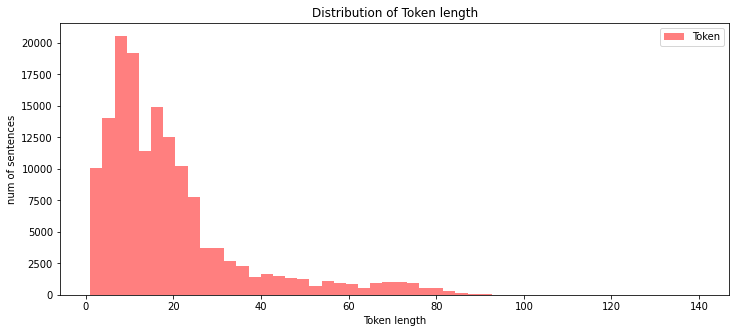

In [193]:
# 히스토그램 시각화
# Token_len 변수를 이용해서, 토큰 길이를 x축에, 문장 개수를 y축에 두는 히스토그램 만들기

plt.figure(figsize=(12,5))
plt.hist(df['Token_len'], alpha=0.5, color='r',bins=50, label='Token', range=[1,140])
plt.title('Distribution of Token length')
plt.xlabel('Token length')
plt.ylabel('num of sentences')
plt.legend()
plt.show()

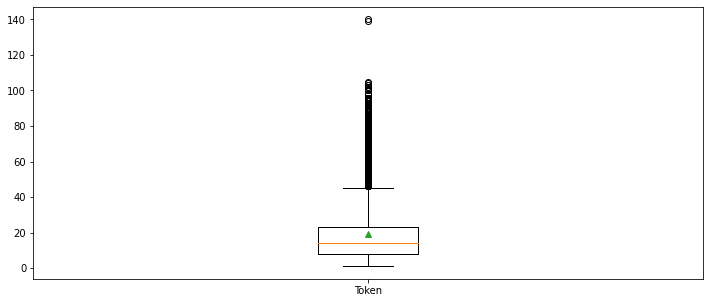

In [195]:
#박스 플롯(Box plot) 만들기

plt.figure(figsize=(12,5))
plt.boxplot(df['Token_len'], labels = ['Token'], showmeans=True)
plt.show()

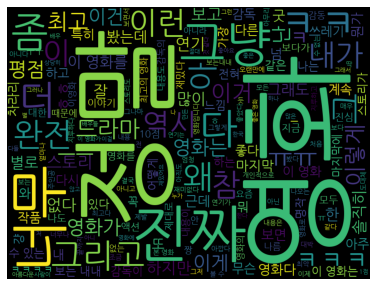

In [196]:
# wordcloud - Document 칼럼의 값을 이용해 그리기

from wordcloud import WordCloud

# 한글로 워드클라우드 그릴 때, 폰트(글씨체)를 지정해줘야 한다.

#폰트 파일 불러오기
path_of_font = r'C:\Users\82103\실용자연어처리(21년2학기)\practical_NLP\NanumGothic.ttf'

wordcloud = WordCloud(font_path = path_of_font,
                       width = 800,
                       height = 600).generate(' '.join(df.Document.astype(str)))

plt.figure(figsize=(12,5))
plt.imshow(wordcloud) #이미지를 보여줘라
plt.axis('off') #이미지에서 x축, y축 안 보이게 해라
plt.show()

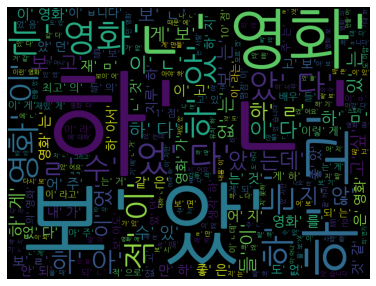

In [197]:
# wordcloud - Token 칼럼의 값을 이용해 그리기

from wordcloud import WordCloud

font_path = r'C:\Users\82103\실용자연어처리(21년2학기)\practical_NLP\NanumGothic.ttf'

wordcloud = WordCloud(font_path = font_path,
                       width = 800,
                       height = 600).generate(' '.join(df.Token.astype(str)))

plt.figure(figsize=(12,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


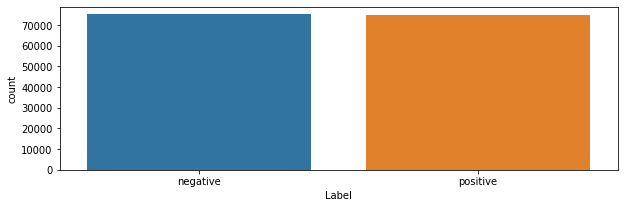

In [198]:
# seaborn으로 시각화하기

import seaborn as sns
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(10, 3)
sns.countplot(df.Label)
plt.show()
